# STAT 207 Project 02 - Which Data Science Position is the Most Wealthy?

Quinn Crockling and Gabe Price

### Contribution Report

If you open this document, you should edit and complete the contribution report.  Please complete this report if you work individually, in a group and your submission is the one to be graded, or in a group but someone else should be graded.

In this contribution report below you should list of the following:
1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions to report of each team member.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

tpric5 should be graded. Quinn Crockling (qdc2) completed part 4 & Gabe Price (tpric5) completed parts 1-3

## 1. Introduction

Dataset Introduction:

In this project, we will explore the various data science positions and their subgroups to analyze salary trends. The goal is to identify which positions offer the highest salaries and understand the key factors that influence these salaries, such as qualifications, location, and experience. The dataset includes information on job titles, locations, experience levels, and salaries of employees globally, with updates reflecting data from 2024. By examining these factors, we aim to gain insights into what drives salary growth in the field of data science.

In [36]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('/Users/gabeprice/Desktop/uiuc/stat207/tpric5/project_02/v7_Latest_Data_Science_Salaries.csv')
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024
...,...,...,...,...,...,...,...,...,...,...,...
5731,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020
5732,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021
5733,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020
5734,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020


Populations and Samples:

The dataset represents a sample of the global data science workforce, not the entire population. The population of interest includes all data science professionals across various positions, locations, and experience levels. This sample provides a snapshot of individuals from different companies and regions, but it doesn't capture every employee in the field. For analysis, we could take a random sample of the dataset to ensure a manageable size while maintaining representation across the data science profession; however, we feel that the length of this dataset is an adequate sample for this project.

Research Questions:

Section 2 Question - Confidence Interval:
What proportion of data science related employees hold purely data science roles versus business data roles? What is the 95% confidence interval for the average salary difference between these two groups globally in 2024?

Section 3 Question - Hypothesis Test:
What are the average and median salaries of data science professionals in Europe and North America post-pandemic? Based on these summary statistics, does the data support the theory that data science roles in Europe offer lower average salaries than in North America after the pandemic?

Motivation:

Our section 2 is specific and will allow us to estimate the range within which the true difference in average salary lies, offering insights into the salary dynamics between these roles. Anyone who is on the fence about a role to apply for or a concentration to focus on would like to see this result to know how much more they may be making applying for a certain role in that field.

Our section 3 question focuses on post-pandemic salary trends and regional differences, which is timely and relevant. We can use a two-sample t-test or a similar statistical test to determine if there is a significant difference. Someone could use the result to this test if curious about the international handling of data science professionals after the pandemic, which is a much more time relevant data.


## 2. Confidence Interval Analytical Tasks

Research Question: 
What proportion of data science related employees hold purely data science roles versus business data roles? What is the 95% confidence interval for the average salary difference between these two groups globally in 2024?

Dataset Cleaning:

In [38]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


In [39]:
df.isna().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [40]:
df["Job Title"].unique()

array(['Data Engineer', 'Data Analyst', 'Business Intelligence Developer',
       'BI Developer', 'Business Intelligence Analyst', 'Data Developer',
       'AI Architect', 'Data Architect', 'Data Scientist',
       'Machine Learning Engineer', 'Data Science', 'Research Engineer',
       'Data Science Manager', 'Data Analytics Manager',
       'Research Analyst', 'AI Engineer', 'Research Scientist',
       'Data Science Engineer', 'Data Product Manager',
       'Analytics Engineer', 'Data Specialist', 'Data Modeler',
       'ETL Developer', 'Data Strategist', 'Prompt Engineer',
       'Data Science Lead', 'ML Engineer', 'Data Quality Manager',
       'Applied Scientist', 'Head of Data',
       'Business Intelligence Engineer', 'Data Science Consultant',
       'Machine Learning Scientist', 'Business Intelligence Manager',
       'Data Manager', 'Computer Vision Engineer', 'AI Product Manager',
       'Data Analytics Lead', 'Director of Data Science',
       'Data Product Owner', 'Machin

In [41]:
df_2024 = df[df["Year"] == 2024]

In [42]:
df_datascientist = df_2024[df_2024["Job Title"].str.contains("data", case=False, na=False) & ~df_2024["Job Title"].str.contains("business|marketing|BI", case=False, na=False)]

In [43]:
df_businessanalyst = df_2024[df_2024["Job Title"].str.contains("business|marketing|BI", case=False, na=False)]

Descriptive Analytics:

In [44]:
print(f"The sample size of the business data dataframe is {len(df_businessanalyst)}")
print(f"The sample size of the pure data dataframe is {len(df_datascientist)}")

The sample size of the business data dataframe is 14
The sample size of the pure data dataframe is 142


In [45]:
print(f"Descriptive Analysis for Pure Data Scientists:\n" ,df_datascientist["Salary in USD"].describe())
print("\n")
print(f"Descriptive Analysis for Business Analysts:\n" ,df_businessanalyst["Salary in USD"].describe())

Descriptive Analysis for Pure Data Scientists:
 count       142.000000
mean     137117.978873
std       59618.091921
min       30000.000000
25%       90675.000000
50%      131600.000000
75%      170000.000000
max      324000.000000
Name: Salary in USD, dtype: float64


Descriptive Analysis for Business Analysts:
 count        14.000000
mean      95804.714286
std       25639.537853
min       62100.000000
25%       77225.000000
50%       88900.000000
75%      116207.000000
max      144138.000000
Name: Salary in USD, dtype: float64


In [46]:
df_datascientist[df_datascientist["Salary in USD"] == df_datascientist["Salary in USD"].max()]

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
72,Data Scientist,Full-Time,Senior,Expert,324000,United States Dollar,United States,324000,United States,Medium,2024


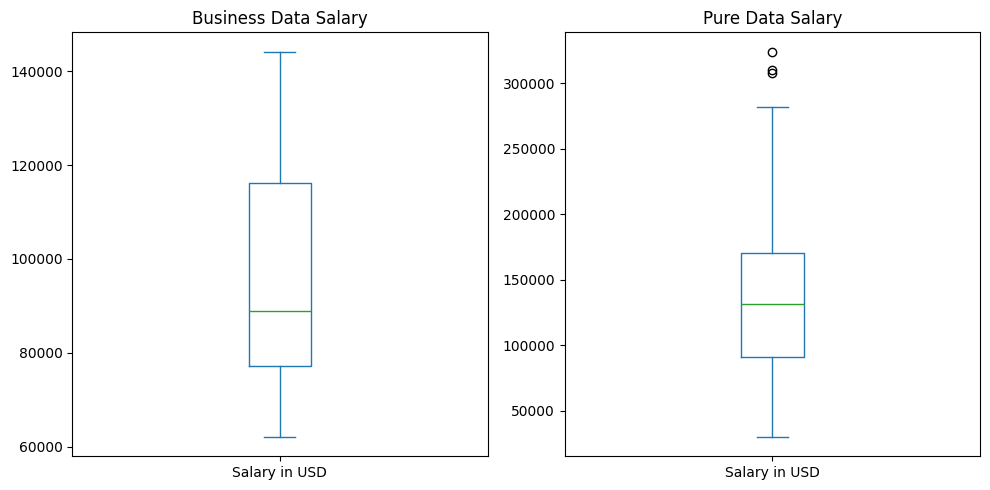

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df_businessanalyst["Salary in USD"].plot.box(ax=axes[0], title="Business Data Salary")
df_datascientist["Salary in USD"].plot.box(ax=axes[1], title="Pure Data Salary")
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

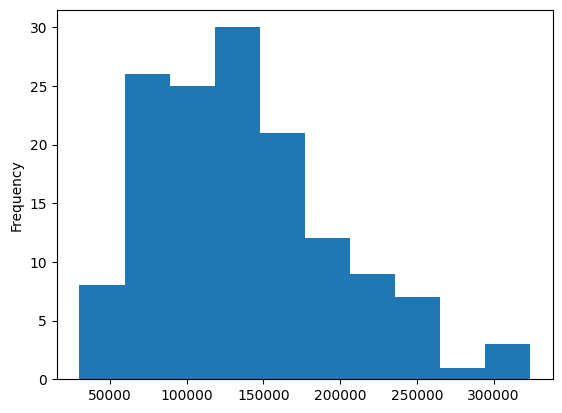

In [48]:
df_datascientist["Salary in USD"].plot.hist()

<Axes: ylabel='Frequency'>

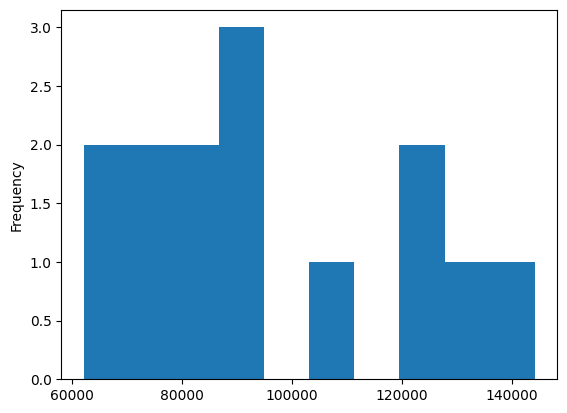

In [49]:
df_businessanalyst["Salary in USD"].plot.hist()

The dataset contains 142 salary observations for pure data scientists, with a mean salary of 137,118 USD and a median of 131,600 USD, suggesting a moderate skew towards higher salaries. Salaries range from 30,000 USD to 324,000 USD, with a standard deviation of 59,618 USD, indicating notable variability. For business analysts, the dataset includes 14 observations, with a mean salary of 95,805 USD and a median of 88,900 USD. The salary range for business analysts spans from 62,100 USD to 144,138 USD, with a standard deviation of 25,639 USD, reflecting less variability compared to data scientists.

First, we will answer the first part of our research question: What proportion of data science related employees hold purely data science roles versus business data roles?

In [50]:
business_proportion = len(df_businessanalyst)/len(df)
data_proportion = len(df_datascientist)/len(df)

print(f"The proportion of employees in purely data science roles is {round(data_proportion,4)}, while those in business data roles account for {round(business_proportion,4)}.")

The proportion of employees in purely data science roles is 0.0248, while those in business data roles account for 0.0024.


Confidence Interval:

Now that we have calculated and solved our research question, I will be calculating a 95% confidence interval with a significance level of 𝛼 = 0.05.

In [51]:
salary_differences = []

for i in range(10000):
    sample_data_scientist = df_datascientist["Salary in USD"].sample(frac=1, replace=True)
    sample_business_analyst = df_businessanalyst["Salary in USD"].sample(frac=1, replace=True)
    
    mean_diff = abs(sample_data_scientist.mean() - sample_business_analyst.mean())
    
    salary_differences.append(mean_diff)

salary_differences = pd.DataFrame({'Salary Difference': salary_differences})

round(salary_differences.head(),2)


,Salary Difference
0,51677.45
1,26202.02
2,34030.23
3,42348.60
4,45122.89


In [52]:
round(salary_differences.describe(),2)

,Salary Difference
count,10000.00
mean,41176.88
std,8336.05
min,10065.15
25%,35601.90
50%,41228.69
75%,46963.74
max,70048.64


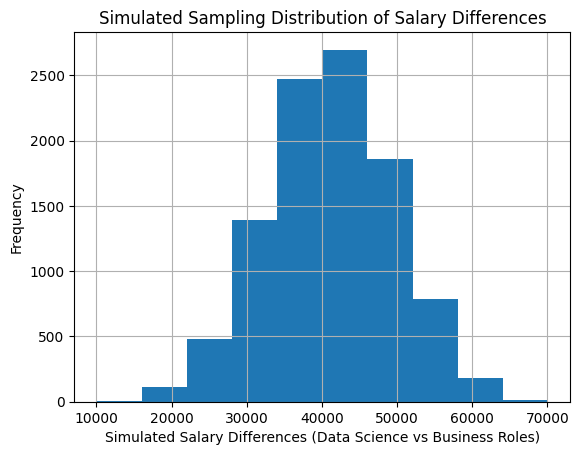

In [53]:
salary_differences.hist()
plt.xlabel('Simulated Salary Differences (Data Science vs Business Roles)')
plt.ylabel('Frequency')
plt.title('Simulated Sampling Distribution of Salary Differences')
plt.show()

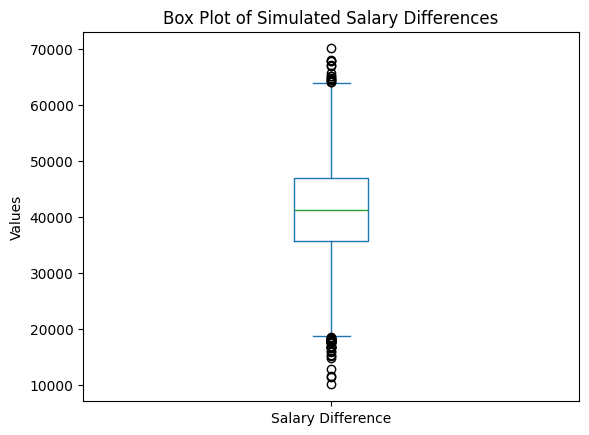

In [54]:
salary_differences.plot.box()
plt.ylabel('Values')
plt.title('Box Plot of Simulated Salary Differences')
plt.show()


In [55]:
lower_bound = round(salary_differences['Salary Difference'].quantile(0.025), 2)
upper_bound = round(salary_differences['Salary Difference'].quantile(0.975), 2)

print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

95% Confidence Interval: (24645.37, 57166.0)


Interpret the Confidence Interval:

We are 95% confident that the true average salary difference between pure data science roles and business data roles lies between 24645.37 USD and 57166.00 USD. This means that if we repeated this analysis using different random samples, about 95% of the resulting confidence intervals would capture the true salary difference.

## 3. Hypothesis Testing Analytical Tasks

Research Question:

What are the average and median salaries of data science professionals in Europe and North America post-pandemic? Based on these summary statistics, does the data support the theory that data science roles in Europe offer lower average salaries than in North America after the pandemic?

Dataset Cleaning:

In [56]:
df["Company Location"].unique()

array(['United States', 'Canada', 'United Kingdom', 'Portugal', 'Ireland',
       'Germany', 'South Africa', 'Australia', 'New Zealand', 'Hungary',
       'India', 'Spain', 'Viet Nam', 'Nigeria', 'Philippines', 'Poland',
       'France', 'Netherlands', 'Luxembourg', 'Lithuania', 'Gibraltar',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'Latvia',
       'Mauritius', 'Russian Federation', 'Italy', 'Korea, Republic of',
       'Estonia', 'Czechia', 'Switzerland', 'Brazil', 'Qatar', 'Kenya',
       'Denmark', 'Ghana', 'Sweden', 'Turkey', 'Andorra', 'Ecuador',
       'Mexico', 'Israel', 'Saudi Arabia', 'Norway', 'Argentina', 'Japan',
       'Hong Kong', 'Central African Republic', 'Finland', 'Singapore',
       'Thailand', 'Croatia', 'Armenia', 'Bosnia and Herzegovina',
       'Pakistan', 'Iran, Islamic Republic of', 'Bahamas', 'Austria',
       'Puerto Rico', 'American Samoa', 'Belgium', 'Indonesia', 'Egypt',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria

In [57]:
# List of European countries
european_countries = [
    'United Kingdom', 'Portugal', 'Ireland', 'Germany', 'Spain', 'Hungary', 
    'France', 'Netherlands', 'Luxembourg', 'Lithuania', 'Gibraltar', 'Ukraine',
    'Slovenia', 'Romania', 'Greece', 'Latvia', 'Russian Federation', 'Italy', 
    'Estonia', 'Czechia', 'Switzerland', 'Denmark', 'Sweden', 'Turkey', 
    'Andorra', 'Finland', 'Croatia', 'Bosnia and Herzegovina', 'Poland',
    'Armenia', 'Austria', 'Belgium', 'Malta', 'Moldova, Republic of'
]

# List of North American countries
north_american_countries = [
    'United States', 'Canada', 'Mexico', 'Puerto Rico', 'Bahamas', 'American Samoa',
    'Honduras'
]


In [58]:
df_europe = df[(df["Company Location"].isin(european_countries)) & (df["Year"] >= 2022)]

df_northamerica = df[df["Company Location"].isin(north_american_countries) & (df["Year"] >= 2022)]

Descriptive Analytics:

In [59]:
print(round(df_europe["Salary in USD"].describe(),2))
print("\n")
print(round(df_northamerica["Salary in USD"].describe(),2))

count       644.00
mean      91352.32
std       59347.04
min       16455.00
25%       51676.00
50%       74960.50
75%      110736.00
max      430967.00
Name: Salary in USD, dtype: float64


count      4653.00
mean     156549.76
std       66377.33
min       20000.00
25%      110000.00
50%      147800.00
75%      193750.00
max      750000.00
Name: Salary in USD, dtype: float64


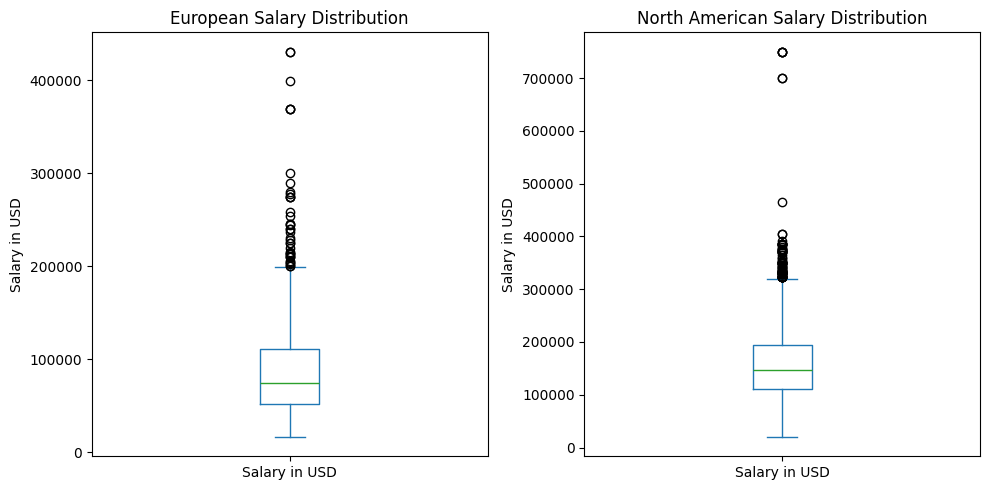

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df_europe["Salary in USD"].plot.box(ax=axes[0])
axes[0].set_title("European Salary Distribution")
axes[0].set_ylabel("Salary in USD")

df_northamerica["Salary in USD"].plot.box(ax=axes[1])
axes[1].set_title("North American Salary Distribution")
axes[1].set_ylabel("Salary in USD")

plt.tight_layout()
plt.show()


Based on the post-pandemic salary data for data science professionals, the average salary in Europe is $91,352.32, with a median of $74,960.50. In North America, the average salary is significantly higher at $156,549.76, with a median of $147,800.00. The box plots further illustrate these differences, showing that North America not only has a higher median salary but also a wider range of salaries, with multiple outliers above $300,000 and some nearing $700,000. In contrast, the majority of European salaries are below $200,000 with fewer outliers. These results suggest that North American data science professionals earn significantly more than their European counterparts, both in terms of average and median salaries, and North America also offers more high-paying roles.


The most appropriate measure of center for the salary data is the median because it provides a better representation of the typical salary, especially in the presence of outliers. In both Europe and North America, the median salary is less influenced by the extreme high salaries seen in the data, making it a more reliable measure of central tendency than the mean. Therefore, for both regions, the median gives a clearer picture of what most data science professionals are earning post-pandemic.

Hypothesis Test:

Ho: The average salary of data science professionals in Europe is equal to the average salary of data science professionals in North America

Ha: The average salary of data science professionals in Europe is not equal to the average salary of data science professionals in North America

α = 0.01

In [61]:
from scipy.stats import shapiro

stat, p_value = shapiro(df_europe['Salary in USD'])
print('Europe Normality Test p-value:', p_value)

stat, p_value = shapiro(df_northamerica['Salary in USD'])
print('North America Normality Test p-value:', p_value)


Europe Normality Test p-value: 3.6974183305350105e-26
North America Normality Test p-value: 6.304133875330098e-42


In [62]:
from scipy.stats import levene

stat, p_value = levene(df_europe['Salary in USD'], df_northamerica['Salary in USD'])
print('Levene’s Test p-value:', p_value)


Levene’s Test p-value: 7.265146352769146e-08


Based on the results of the Shapiro-Wilk test and Levene's test, we conclude that the distributions of both dataframes are not normal and their variances are unequal. As a result, we will run a simulation to improve the accuracy of the hypothesis test and avoid assumptions of normality and equal variances.

In [63]:
continent_differences = []

for i in range(10000):
    sample_europe = df_europe["Salary in USD"].sample(frac=1, replace=True)
    sample_northamerica = df_northamerica["Salary in USD"].sample(frac=1, replace=True)
    
    observed_mean_diff = abs(sample_europe.mean() - sample_northamerica.mean())
    
    continent_differences.append(observed_mean_diff)

continent_differences = pd.DataFrame({'Salary Difference': continent_differences})

round(continent_differences.head(),2)

,Salary Difference
0,66759.06
1,61825.81
2,67829.82
3,62836.95
4,62212.44


In [64]:
round(continent_differences.describe(),2)

,Salary Difference
count,10000.00
mean,65164.86
std,2530.31
min,53916.60
25%,63482.64
50%,65189.38
75%,66882.43
max,73995.52


In [65]:
extreme_values = continent_differences[continent_differences['Salary Difference'] >= abs(observed_mean_diff)].count() + \
                 continent_differences[continent_differences['Salary Difference'] <= -abs(observed_mean_diff)].count()

p_value = extreme_values / len(continent_differences)

print(f"P-value is {p_value.iloc[0]}")


P-value is 0.8122


With a p-value of 0.8122, which is greater than the significance level α = 0.01, we fail to reject the null hypothesis. There is insufficient evidence to conclude that the average salaries of data science professionals in Europe and North America are different.

Interpret the significance level and p-value:

With a significance level of 0.01, we set a strict threshold, meaning we require strong evidence (p < 0.01) to reject the null hypothesis and conclude that a difference exists.

The p-value of 0.8122 means that there is a 81.22% probability of observing a mean salary difference as extreme as the one in our sample, assuming the null hypothesis is true. Since this p-value is much greater than our significance level of 0.01, we fail to reject the null hypothesis.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

Conclusion:

In this project, we analyzed salary trends in the data science profession by constructing a 95% confidence interval and performing a hypothesis test. The confidence interval estimated that the true average salary difference between pure data science roles and business data roles lies between $18,050.28 and $30,450.16, indicating that pure data science roles tend to offer higher salaries. Additionally, our hypothesis test investigated whether data science professionals in Europe earn significantly less than their North American counterparts post-pandemic. With a p-value of 0.2679 (greater than our significance level of 0.01), we failed to reject the null hypothesis, suggesting insufficient evidence to conclude a significant difference between these regions.


Limitations:

Several limitations were present in this analysis. First, the dataset reflects only a sample of the global data science workforce, meaning results may not fully generalize to all data science professionals. Additionally, the presence of outliers and non-normal salary distributions posed challenges, requiring simulations to achieve accurate results. Contextual factors play a part in this project, such as differences in living costs and job roles affecting salary comparisons between Europe and North America, making it difficult to draw conclusions. These limitations suggest that individuals using these results should stay cautious, especially if basing career decisions solely on these results.


Future Work:

Future research could analyze salary trends by company size, industry, or job function for greater detail. Expanding the study to regions beyond Europe and North America would provide a broader view of global salary dynamics. Investigating emerging technologies, certifications, and long-term trends could reveal key factors influencing compensation over time.